# Objective: Test the candidate ability to industrialize, no data science skills or clustering results would be assessed.
##### Data: Static geographical information of CityBike‘s stations in Brisbane (“Brisbane_CityBike.json”)
#### Instructions: Propose a code to perform a clustering based on either the location or characteristics of bike stations. Any clustering library can be used no assessment is done on the choice of the library. The data is a subset provided by the business.It should be developed as close as a real industrialized process. In production this code should be launched daily on 10 Go of data, the choice of the platform is up to you it can be run on a Spark cluster or Kubernetes Cluster or Azure function.
##### Languages: Either Scala or Python (or C# if on Azure function).
##### Deliveries: The delivery of this test should contain:
##### •	Code: A zip file containing all your code or a link to a repository
##### •	Readme: How the job is launched, and short description of your program
##### •	Output: directory with the clustering result


In [4]:
import pyspark
pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [5]:
spark = SparkSession.builder.appName('TP_CLUSTERING').getOrCreate()

In [6]:
spark

In [11]:
# A JSON dataset is pointed to by path.
# The path can be either a single text file or a directory storing text files
path = "/Users/Utilisateur/Desktop/PySpark/second_week/TPsecondweek/CityBike.json"
bikemap = spark.read.json(path)

# The inferred schema can be visualized using the printSchema() method
bikemap.printSchema()

root
 |-- address: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- name: string (nullable = true)
 |-- number: long (nullable = true)



In [14]:
bikemap.collect()

[Row(address='Lower River Tce / Ellis St', latitude=-27.482279, longitude=153.028723, name='122 - LOWER RIVER TCE / ELLIS ST', number=122),
 Row(address='Main St / Darragh St', latitude=-27.47059, longitude=153.036046, name='91 - MAIN ST / DARRAGH ST', number=91),
 Row(address='Sydney St Ferry Terminal / Park', latitude=-27.474531, longitude=153.042728, name='88 - SYDNEY ST FERRY TERMINAL / PARK', number=88),
 Row(address='Browne St / James St', latitude=-27.461881, longitude=153.046986, name='75 - BROWNE ST / JAMES ST', number=75),
 Row(address='Kurilpa Point / Montague Rd', latitude=-27.469658, longitude=153.016696, name='98 - KURILPA POINT / MONTAGUE RD', number=98),
 Row(address='Montague Rd / Skinner St', latitude=-27.48172, longitude=153.00436, name='109 - MONTAGUE RD / SKINNER ST', number=109),
 Row(address='Macquarie St / Guyatt Park', latitude=-27.493626, longitude=153.001482, name='149 - MACQUARIE ST / GUYATT PARK', number=149),
 Row(address='Bi-centennial Bike Way / Lang Pde

In [15]:
bikemap.show(10)

+--------------------+----------+----------+--------------------+------+
|             address|  latitude| longitude|                name|number|
+--------------------+----------+----------+--------------------+------+
|Lower River Tce /...|-27.482279|153.028723|122 - LOWER RIVER...|   122|
|Main St / Darragh St| -27.47059|153.036046|91 - MAIN ST / DA...|    91|
|Sydney St Ferry T...|-27.474531|153.042728|88 - SYDNEY ST FE...|    88|
|Browne St / James St|-27.461881|153.046986|75 - BROWNE ST / ...|    75|
|Kurilpa Point / M...|-27.469658|153.016696|98 - KURILPA POIN...|    98|
|Montague Rd / Ski...| -27.48172| 153.00436|109 - MONTAGUE RD...|   109|
|Macquarie St / Gu...|-27.493626|153.001482|149 - MACQUARIE S...|   149|
|Bi-centennial Bik...|-27.476076|153.002459|139 - BI-CENTENNI...|   139|
|Sir William McGre...|-27.493963|153.011938|24 - SIR WILLIAM ...|    24|
|Vulture St / Trib...|-27.482197|153.020894|117 - VULTURE ST ...|   117|
+--------------------+----------+----------+-------

In [94]:
bikemap.count()

149

In [76]:
#verifying whether we have missing values or not
from pyspark.sql.functions import isnan, when, count, col

Dict_Null = {col:bikemap.filter(df[col].isNull()).count() for col in df.columns}
Dict_Null

{'latitude': 0, 'longitude': 0, 'name': 0}

In [95]:
#removing duplicate values
num_duplicate = bikemap.dropDuplicates()
num_duplicate.show(10)

+--------------------+----------+----------+--------------------+------+
|             address|  latitude| longitude|                name|number|
+--------------------+----------+----------+--------------------+------+
|O'Connell St / La...|-27.474992|153.037647|130 - O'CONNELL S...|   130|
|Gardens Point Rd ...|-27.479004|153.028853|19 - GARDENS POIN...|    19|
|Cordelia St / Pee...|-27.474011|153.014541|99 - CORDELIA ST ...|    99|
|Albert St Mall / ...| -27.47019|153.025852|15 - ALBERT STREE...|    15|
|   Ann St / Gipps St|-27.459833|153.033445|49 - ANN STREET /...|    49|
|Rogers St / Monta...|-27.485078|153.002382|108 - ROGERS ST /...|   108|
|WATERLOO ST (GASW...|-27.448074|153.045762|76 - WATERLOO ST ...|    76|
|Orleigh St / Hoog...|-27.489807|153.002405|106 - ORLEIGH ST ...|   106|
|VULTURE ST / STAN...|-27.483259|153.026946|121 - VULTURE ST ...|   121|
|Sandford St / Aus...|-27.492489|152.996768|148 - SANDFORD ST...|   148|
+--------------------+----------+----------+-------

In [98]:
num_duplicate.count()
# we don't have duplicate values

149

In [99]:
#choosing 3 columns to decide which ones to use according to what is asked in TP
df = num_duplicate.select('latitude','longitude','name')
df.show()

+----------+----------+--------------------+
|  latitude| longitude|                name|
+----------+----------+--------------------+
|-27.474992|153.037647|130 - O'CONNELL S...|
|-27.479004|153.028853|19 - GARDENS POIN...|
|-27.474011|153.014541|99 - CORDELIA ST ...|
| -27.47019|153.025852|15 - ALBERT STREE...|
|-27.459833|153.033445|49 - ANN STREET /...|
|-27.485078|153.002382|108 - ROGERS ST /...|
|-27.448074|153.045762|76 - WATERLOO ST ...|
|-27.489807|153.002405|106 - ORLEIGH ST ...|
|-27.483259|153.026946|121 - VULTURE ST ...|
|-27.492489|152.996768|148 - SANDFORD ST...|
|-27.480164|153.016181|113 - EDMONDSTONE...|
|-27.468839|153.011115|133 - CORONATION ...|
|-27.482081|152.995804|142 - SYLVAN RD /...|
|-27.461803|153.036021|53 - BOWEN TCE / ...|
|-27.469296|153.035533|90 - MAIN ST / RO...|
|-27.493626|153.001482|149 - MACQUARIE S...|
|-27.458641| 153.03208|50 - GIPPS ST / W...|
|-27.466753|153.020012|33 - ROMA ST / HE...|
|-27.468407|153.048273|83 - SYDNEY ST / ...|
|-27.49287

In [82]:
#Propose a code to perform a clustering based on the location: 'latitude', 'longitude' as features 
from pyspark.ml.feature import VectorAssembler

vecAssembler = VectorAssembler(inputCols=["latitude", "longitude"], outputCol="features")
new_df = vecAssembler.transform(df)

In [83]:
new_df.show()

+----------+----------+--------------------+--------------------+
|  latitude| longitude|                name|            features|
+----------+----------+--------------------+--------------------+
|-27.474992|153.037647|130 - O'CONNELL S...|[-27.474992,153.0...|
|-27.479004|153.028853|19 - GARDENS POIN...|[-27.479004,153.0...|
|-27.474011|153.014541|99 - CORDELIA ST ...|[-27.474011,153.0...|
| -27.47019|153.025852|15 - ALBERT STREE...|[-27.47019,153.02...|
|-27.459833|153.033445|49 - ANN STREET /...|[-27.459833,153.0...|
|-27.485078|153.002382|108 - ROGERS ST /...|[-27.485078,153.0...|
|-27.448074|153.045762|76 - WATERLOO ST ...|[-27.448074,153.0...|
|-27.489807|153.002405|106 - ORLEIGH ST ...|[-27.489807,153.0...|
|-27.483259|153.026946|121 - VULTURE ST ...|[-27.483259,153.0...|
|-27.492489|152.996768|148 - SANDFORD ST...|[-27.492489,152.9...|
|-27.480164|153.016181|113 - EDMONDSTONE...|[-27.480164,153.0...|
|-27.468839|153.011115|133 - CORONATION ...|[-27.468839,153.0...|
|-27.48208

In [102]:
new_df.printSchema()

root
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- name: string (nullable = true)
 |-- features: vector (nullable = true)



In [103]:
new_df.summary()

DataFrame[summary: string, latitude: string, longitude: string, name: string]

In [86]:
#applying K-means clustering
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=2, seed=1)  
model = kmeans.fit(new_df.select('features'))

In [87]:
transformed = model.transform(new_df).cache()
transformed.show()

+----------+----------+--------------------+--------------------+----------+
|  latitude| longitude|                name|            features|prediction|
+----------+----------+--------------------+--------------------+----------+
|-27.474992|153.037647|130 - O'CONNELL S...|[-27.474992,153.0...|         0|
|-27.479004|153.028853|19 - GARDENS POIN...|[-27.479004,153.0...|         0|
|-27.474011|153.014541|99 - CORDELIA ST ...|[-27.474011,153.0...|         1|
| -27.47019|153.025852|15 - ALBERT STREE...|[-27.47019,153.02...|         0|
|-27.459833|153.033445|49 - ANN STREET /...|[-27.459833,153.0...|         0|
|-27.485078|153.002382|108 - ROGERS ST /...|[-27.485078,153.0...|         1|
|-27.448074|153.045762|76 - WATERLOO ST ...|[-27.448074,153.0...|         0|
|-27.489807|153.002405|106 - ORLEIGH ST ...|[-27.489807,153.0...|         1|
|-27.483259|153.026946|121 - VULTURE ST ...|[-27.483259,153.0...|         1|
|-27.492489|152.996768|148 - SANDFORD ST...|[-27.492489,152.9...|         1|

In [88]:
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(transformed)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.6555267089340288


In [89]:
#computing the coordinates of cluster centers
centers = model.clusterCenters()

In [90]:
for c in centers : 
  print(c)

[-27.46494911 153.03505678]
[-27.48022273 153.01108756]


In [91]:
# plotting the cost 
import numpy as np
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(new_df)
    cost[k] = model.summary.trainingCost

Text(0, 0.5, 'cost')

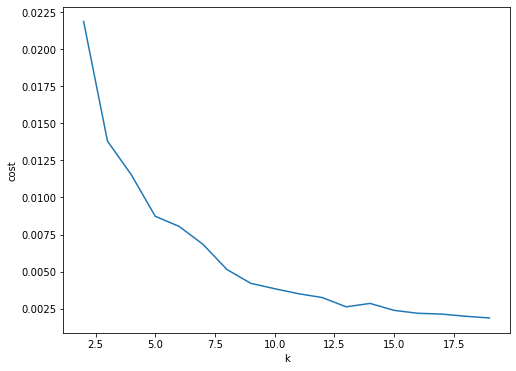

In [92]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

##### --> With 2 clusters we have the best categorizing by considering Silhouette value. I Started with 10 clusters.
#### Silhouette with squared euclidean distance = 0.4885416627878881 (with 10 clusters)
#### Silhouette with squared euclidean distance = 0.5078526719305728 (with 6 clusters)
#### Silhouette with squared euclidean distance = 0.5504549954951903 (with 5 clusters)
#### Silhouette with squared euclidean distance = 0.5339471581545366 (with 4 clusters)
#### Silhouette with squared euclidean distance = 0.588169797378973   (with 3 clusters)
#### Silhouette with squared euclidean distance = 0.6436603521214308 (with 2 clusters)
